In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

### Conclusion of the dataset:

#### 1. Weekend generally have more completed trips than weekday time
#### 2. Driver can start their work at 3-6pm for more completed trips
#### 3. Drivers are likely to pick up more customers faster in office work hour and mid night hour
#### 4. Morning period is not a good time for uber driver for their business
#### 5. 4pm is the best starting hour of uber drivers if they want to achieve the highest number of business of their day
#### 6. Part time uber drivers are recommend to start their work after 8pm for a steady customer surplus requests

### Import dataset and perform data cleaning

In [2]:
# Read the dataset
df = pd.read_csv('dataset_1.csv')

In [3]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [5]:
# Check any null values
df.isna().sum()

Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

In [6]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [8]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,NaT,8,6,0,2,2,14
2,NaT,9,8,3,0,0,14
3,NaT,10,9,2,0,1,14
4,NaT,11,11,1,4,4,11


In [9]:
# Foward fill the date column
df['Date'].ffill(inplace=True)

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Extract week of day from date
df['day_name'] = df['Date'].dt.day_name()
df['day_of_week'] = df['Date'].dt.day_of_week

# Convert the date by showing the date only
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [10]:
# Convert 'Date' column to datetime
df['Date_Time'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert 'Hour' column to timedelta
df['Hour'] = pd.to_timedelta(df['Time (Local)'], unit='h')

# Combine 'Date' and 'Hour' columns
df['Combined'] = df['Date_Time'] + df['Hour']

# Format the combined date and hour
df['Combined'] = df['Combined'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Drop the unnecessary columns
df.drop(['Date_Time', 'Hour'], axis=1, inplace=True)

# Rename the combined column
df.rename(columns={'Combined': 'Date_time'}, inplace=True)

In [11]:
# Create date dimension table
df_date = df[['Date', 'day_of_week','day_name']]

### By calculating the complete trip in each day, we can see weekends have more complete trips than the normal weekday 

In [12]:
# Remove leading and trailing spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

In [13]:
# Aggregrate the sum of trips by date
sum_of_trips = df.groupby('Date')['Completed Trips'].sum().reset_index()

# Join table to get the day of week and day name
trips_by_day = sum_of_trips.merge(df[['Date', 'day_name', 'day_of_week']], on='Date', how='left').drop_duplicates()

trips_by_day.sort_values(by='Completed Trips', ascending=False)

,Date,Completed Trips,day_name,day_of_week
281,2012-09-22,248,Saturday,5
113,2012-09-15,199,Saturday,5
257,2012-09-21,190,Friday,4
305,2012-09-23,111,Sunday,6
89,2012-09-14,108,Friday,4
137,2012-09-16,93,Sunday,6
41,2012-09-12,91,Wednesday,2
233,2012-09-20,70,Thursday,3
161,2012-09-17,57,Monday,0
65,2012-09-13,45,Thursday,3


#### To be more specific, Saturday are having the highest completed trips while Friday are also good in number.
#### While Monday to Wednesday are at the bottom of the completed trips

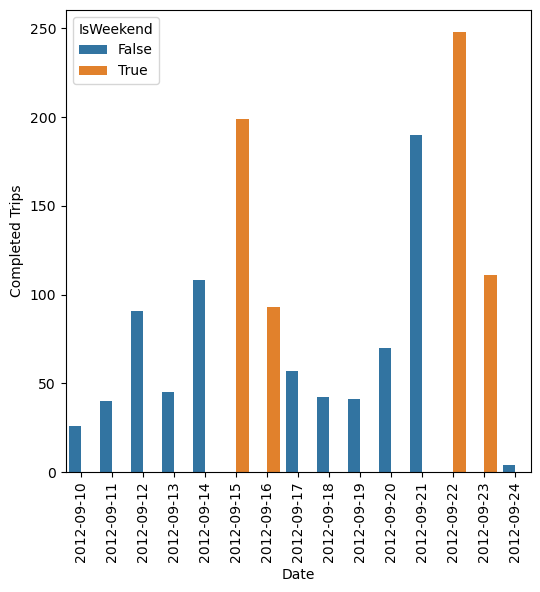

In [14]:
# Create a new column to indicate if it's a weekend or not
trips_by_day['IsWeekend'] = trips_by_day['day_of_week'].isin([5, 6])

# Plot the bar chart with highlighted bars for weekends
plt.figure(figsize=(6, 6))
sns.barplot(x='Date', y='Completed Trips', data=trips_by_day, hue='IsWeekend')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


### For the most demanding 24 hour period, it usually start from 3 - 6pm and driver can start their business in this interval

In [15]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_name,day_of_week,Date_time
0,2012-09-10,7,5,0,2,2,9,Monday,0,2012-09-10 07:00:00
1,2012-09-10,8,6,0,2,2,14,Monday,0,2012-09-10 08:00:00
2,2012-09-10,9,8,3,0,0,14,Monday,0,2012-09-10 09:00:00
3,2012-09-10,10,9,2,0,1,14,Monday,0,2012-09-10 10:00:00
4,2012-09-10,11,11,1,4,4,11,Monday,0,2012-09-10 11:00:00


In [16]:
# Rename the combined column
df.rename(columns={'Combined': 'Date_time'}, inplace=True)

# Format the date
df['Date_time'] = pd.to_datetime(df['Date_time'], format='%Y-%m-%d %H:%M:%S') 


In [17]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_name,day_of_week,Date_time
0,2012-09-10,7,5,0,2,2,9,Monday,0,2012-09-10 07:00:00
1,2012-09-10,8,6,0,2,2,14,Monday,0,2012-09-10 08:00:00
2,2012-09-10,9,8,3,0,0,14,Monday,0,2012-09-10 09:00:00
3,2012-09-10,10,9,2,0,1,14,Monday,0,2012-09-10 10:00:00
4,2012-09-10,11,11,1,4,4,11,Monday,0,2012-09-10 11:00:00


In [18]:
df.drop(['Date', 'day_name'], axis=1, inplace=True)

In [19]:
# Set up foward window indexer and perform rolling sum
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs = df.set_index("Date_time").rolling(window=indexer, min_periods=1).sum().reset_index()

# Convert the date_time column to datetime
df_agg_twentyfour_hrs['Date_time'] = pd.to_datetime(df_agg_twentyfour_hrs['Date_time'])

# Concatenate the date_time column with the next 24 hours
df_agg_twentyfour_hrs['time_interval'] = df_agg_twentyfour_hrs['Date_time'].astype(str) + ' - ' + ((df_agg_twentyfour_hrs['Date_time'] + timedelta(hours=24)).astype(str))

In [20]:
df_agg_twentyfour_hrs.nlargest(5, 'Completed Trips')

,Date_time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,time_interval
274,2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0,113.0,2012-09-21 17:00:00 - 2012-09-22 17:00:00
273,2012-09-21 16:00:00,276.0,1006.0,194.0,274.0,361.0,348.0,112.0,2012-09-21 16:00:00 - 2012-09-22 16:00:00
277,2012-09-21 20:00:00,276.0,971.0,192.0,261.0,347.0,324.0,116.0,2012-09-21 20:00:00 - 2012-09-22 20:00:00
272,2012-09-21 15:00:00,276.0,961.0,182.0,260.0,345.0,344.0,111.0,2012-09-21 15:00:00 - 2012-09-22 15:00:00
275,2012-09-21 18:00:00,276.0,988.0,184.0,260.0,351.0,349.0,114.0,2012-09-21 18:00:00 - 2012-09-22 18:00:00


#### In an hour to hour perspective Within a day, office off work hour and mid night hour are having the most successful trips
#### Surprisingly, we don't see much customers jump in uber at the morning. However, We can also see the completed trips are gradually increase from the morning to afternoon hour

<Axes: xlabel='Time (Local)', ylabel='Completed Trips'>

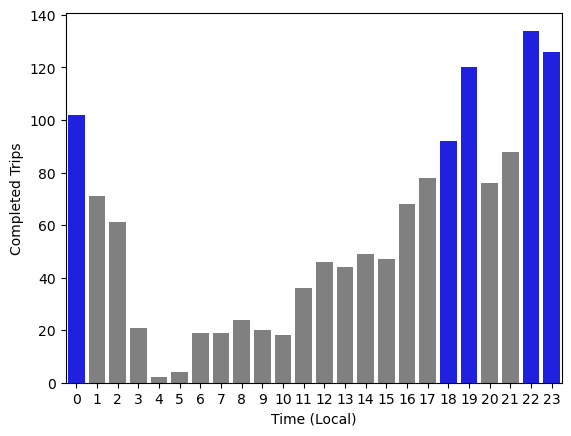

In [21]:
trips_by_time = df.groupby('Time (Local)')['Completed Trips'].sum().reset_index()

# Rank the trips by time
trips_by_time['trips_rank'] = trips_by_time['Completed Trips'].rank(ascending=False).astype(int)

# color the plot based on top 5 or not
coloring = ['grey' if (x < trips_by_time['Completed Trips'].nlargest(5).min()) else 'blue' for x in trips_by_time['Completed Trips']]

sns.barplot(x='Time (Local)', y='Completed Trips', data=trips_by_time, palette=coloring)

### What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

### Customer see no cars on the screen in weekend is quite high

In [22]:
# Slice the dataframe after the specific date and time
df_weekend = df[((df['day_of_week'] == 4) & (df['Time (Local)'] >= 17)) |
               ((df['day_of_week'] == 5)) |
               ((df['day_of_week'] == 6) & (df['Time (Local)'] < 2))
               ]

# total user have zero car on their screen
total_zero = df['Zeroes'].sum()

# total user have zero car on their screen in weekend period
weekend_zero = df_weekend['Zeroes'].sum()

# zero percentage in weekend compare to total
weekend_zero_ratio = (weekend_zero / total_zero) * 100

print("Percentage of zero car on user screen in the weekend: " + str(weekend_zero_ratio))

Percentage of zero car on user screen in the weekend: 44.43666899930021


### The weighted average ratio graph can further support the insight of more customers use uber in the office off hour and mid night time

In [23]:
# Weighted average ratio of completed trips
df['Weighted_avg_completed_trips'] = df['Completed Trips'] / df['Unique Drivers']

# Replace the inf values with 0
df['Weighted_avg_completed_trips'].replace([np.inf, -np.inf], 0, inplace=True)

completed_weighted_avg = df.groupby('Time (Local)')['Weighted_avg_completed_trips'].mean().reset_index()

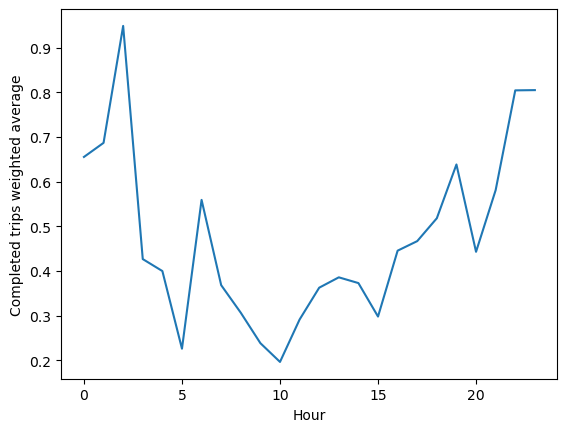

In [24]:
ax = sns.lineplot(x='Time (Local)', y='Weighted_avg_completed_trips', data=completed_weighted_avg)

# Set the label text for the y-axis and x-axis
ax.set_ylabel('Completed trips weighted average')
ax.set_xlabel('Hour')

# Show the plot
plt.show()

### Consider uber drivers have a 8 working hour, 4pm is the good beginning hour according to the highest completed trips they can have

In [25]:
# Cast the date_time column to datetime
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')

# Create the 8 hrs rolling sum dataframe
df_eight_hours = df.set_index('Date_time').resample('8H').sum().reset_index()

# Create the time interval column
df_eight_hours['time_interval'] = df_eight_hours['Date_time'].astype(str) + ' - ' + (df_eight_hours['Date_time'] + timedelta(hours=8)).astype(str)

In [26]:
# Top 5 highest customer uber car requests interval
df_eight_hours.nlargest(5, 'Requests')

,Date_time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,Weighted_avg_completed_trips,time_interval
35,2012-09-21 16:00:00,156,515,88,153,192,198,32,6.357265,2012-09-21 16:00:00 - 2012-09-22 00:00:00
38,2012-09-22 16:00:00,156,469,113,127,175,142,40,7.314552,2012-09-22 16:00:00 - 2012-09-23 00:00:00
17,2012-09-15 16:00:00,156,436,152,112,170,107,40,8.299235,2012-09-15 16:00:00 - 2012-09-16 00:00:00
14,2012-09-14 16:00:00,156,353,46,81,95,121,32,4.997644,2012-09-14 16:00:00 - 2012-09-15 00:00:00
37,2012-09-22 08:00:00,92,325,78,70,91,77,40,6.780556,2012-09-22 08:00:00 - 2012-09-22 16:00:00


### For the part time drivers, starting the business after 8pm will be a great choice as the customer car request is higher than the drivers supply. They can have a steady number of successful trips while without using too much of their time

In [27]:
# Create the supply and demand dataframe and unpivot it for plotting

df_supply_demand = df.groupby('Time (Local)').agg({'Requests': 'sum', 'Unique Drivers': 'sum'}).reset_index()
df_supply_demand_melted = df_supply_demand.melt(id_vars = 'Time (Local)', value_vars = ['Requests', 'Unique Drivers'], value_name = 'total')

<Axes: xlabel='Time (Local)', ylabel='total'>

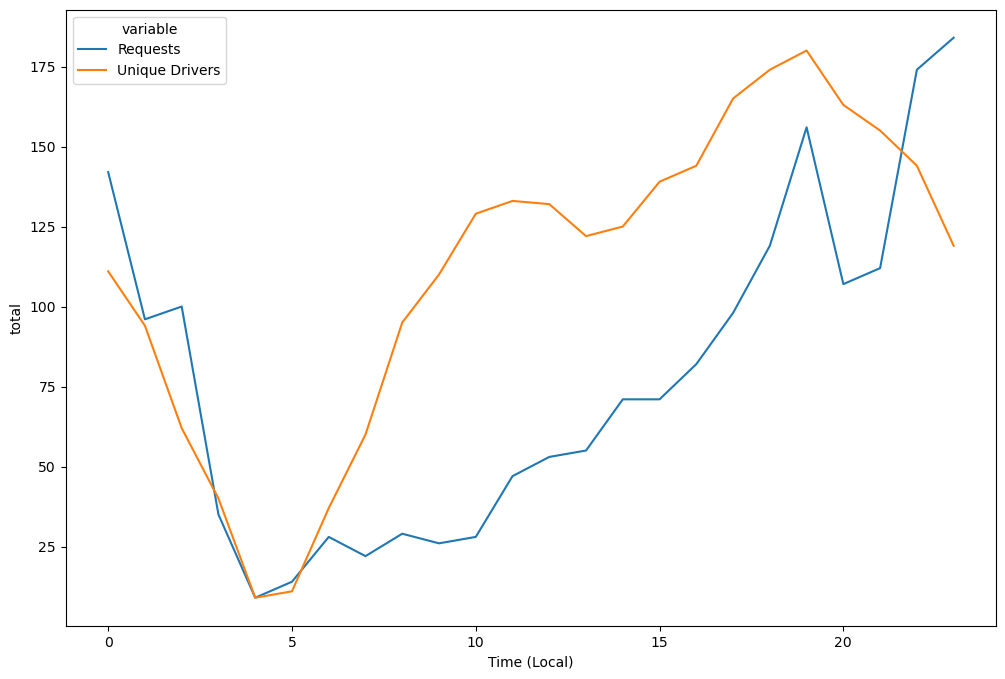

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Time (Local)', y='total', hue = 'variable',data = df_supply_demand_melted)

### Customer have the a low chance to request uber car at 5am morning

In [29]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_seventytwo_hrs = df.set_index("Date_time").rolling(window=indexer, min_periods=1).sum().reset_index()

# Include only the completed 72 hours rolling sum rows 
df_agg_seventytwo_hrs = df_agg_seventytwo_hrs[df_agg_seventytwo_hrs["Date_time"] <= (df_agg_seventytwo_hrs["Date_time"].max() - pd.Timedelta(hours=72))]

# Create the time interval column
df_agg_seventytwo_hrs['time_interval'] = df_agg_seventytwo_hrs['Date_time'].astype(str) + ' - ' + (df_agg_seventytwo_hrs['Date_time'] + pd.Timedelta(hours=72)).astype(str)

# Zeros to eyeballs ratio for the percentage of customer who have seen no cars on their screen
df_agg_seventytwo_hrs['zeros_eyeballs_ratio'] = df_agg_seventytwo_hrs['Zeroes'] / df_agg_seventytwo_hrs['Eyeballs']

In [30]:
df_agg_seventytwo_hrs.nlargest(1, 'zeros_eyeballs_ratio')

,Date_time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,Weighted_avg_completed_trips,time_interval,zeros_eyeballs_ratio
118,2012-09-15 05:00:00,828.0,1495.0,438.0,292.0,431.0,454.0,244.0,37.088176,2012-09-15 05:00:00 - 2012-09-18 05:00:00,0.292977
